In [22]:
import ipywidgets as widgets
import json
import requests
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display, HTML

url = "https://www.dmi.dk/dmidk_byvejrWS/rest/location/area/1000/55.1/56.2/11.2/14.0"

r = requests.get(url)
r.encoding = 'utf-8'
res = r.json()

In [23]:
data = {}
for city in res:
    data[city['name']] = city['id']

In [24]:
city = widgets.Dropdown(
    options=sorted(data),
    value="København",
    description='Number:',
    disabled=False,
)
display(city)

Dropdown(description='Number:', index=134, options=('Abbekås', 'Albertslund', 'Allerum', 'Allerød', 'Alstad', …

In [25]:
urlcity = "https://www.dmi.dk/NinJo2DmiDk/ninjo2dmidk?cmd=llj&id={}&tz=Europe/Copenhagen".format(data[city.value])
r = requests.get(urlcity)
r.encoding = 'utf-8'
res = r.json()

In [26]:
data = res['timeserie']
for obs in data:
    for item in obs:
        print("{}:{}".format(item,obs[item]))


humidity:42.12169
precipType:regn
pressure:1008.54315
temp50:10.225311
time:20190228130000
temp:10.159515
prec75:0.0
windDegree:337.85032777227957
precip1:0.0
visibility:62656.26
precip6:0.0
temp10:9.041473
windSpeed:3.3259393383373372
prec50:0.0
prec10:-7.877947e-05
prec90:3.2424927e-05
temp90:11.147247
windspeed10:2.85857
symbol:1
windspeed90:3.8042445
windDir:NNV
windspeed50:3.3210287
windGust:8.855022
precip3:0.0
humidity:39.782684
precipType:regn
pressure:1008.95685
temp50:10.43158
time:20190228140000
temp:10.43457
prec75:0.0
windDegree:335.51622812927667
precip1:0.0
visibility:62657.723
precip6:0.0
temp10:9.358673
windSpeed:3.6260027320712656
prec50:0.0
prec10:-1.52468565e-05
prec90:4.1484833e-05
temp90:11.47113
windspeed10:3.365493
symbol:1
windspeed90:4.107125
windDir:NNV
windspeed50:3.5825024
windGust:9.207598
precip3:0.0
humidity:39.768127
precipType:regn
pressure:1008.5149
temp50:10.158417
time:20190228150000
temp:10.200348
prec75:0.0
windDegree:331.5789931095409
precip1:0.0

windspeed90:3.3257303
windDir:SSV
windspeed50:2.3341582
windGust:6.2025537
precip3:0.0025177002
humidity:87.63787
precipType:regn
pressure:1011.2174
temp50:1.0707397
time:20190302080000
temp:0.8821106
prec75:0.004863739
windDegree:212.61466397205004
precip1:0.0027313232
visibility:10085.092
precip6:0.0052490234
temp10:-0.58621216
windSpeed:2.3807006482608517
prec50:4.5776367e-05
prec10:-3.0267984e-09
prec90:0.01297617
temp90:1.8181458
windspeed10:1.9192595
symbol:2
windspeed90:3.5063503
windDir:SSV
windspeed50:2.4468052
windGust:5.5177484
precip3:0.0052490234
humidity:85.69909
precipType:regn
pressure:1010.9236
temp50:1.801117
time:20190302090000
temp:1.5651245
prec75:0.011749268
windDegree:218.9072527168786
precip1:0.0024108887
visibility:11963.892
precip6:0.007659912
temp10:-0.1121521
windSpeed:2.6831167982728275
prec50:0.0013504028
prec10:-3.0267984e-09
prec90:0.018683434
temp90:2.752411
windspeed10:1.9860499
symbol:2
windspeed90:3.3993278
windDir:SV
windspeed50:2.7787135
windGust:5

prec10:None
prec90:None
temp90:None
windspeed10:None
symbol:103
windspeed90:None
windDir:SV
windspeed50:None
windGust:None
precip3:0.0
humidity:91.90959
precipType:regn
pressure:985.2475
temp50:None
time:20190304070000
temp:3.4516907
prec75:None
windDegree:208.4311136283773
precip1:None
visibility:None
precip6:0.0
temp10:None
windSpeed:3.082417395011635
prec50:None
prec10:None
prec90:None
temp90:None
windspeed10:None
symbol:3
windspeed90:None
windDir:SSV
windspeed50:None
windGust:None
precip3:0.02734375
humidity:89.499214
precipType:regn
pressure:982.73376
temp50:None
time:20190304100000
temp:3.1781921
prec75:None
windDegree:126.37425796798658
precip1:None
visibility:None
precip6:0.02734375
temp10:None
windSpeed:3.5268074379884817
prec50:None
prec10:None
prec90:None
temp90:None
windspeed10:None
symbol:3
windspeed90:None
windDir:SÃ
windspeed50:None
windGust:None
precip3:0.515625
humidity:93.781105
precipType:regn
pressure:980.4125
temp50:None
time:20190304130000
temp:3.7422485
prec75:N

windGust:None
precip3:None
humidity:91.94755
precipType:regn
pressure:1009.04
temp50:None
time:20190310010000
temp:4.674988
prec75:None
windDegree:264.81151204703104
precip1:None
visibility:None
precip6:0.546875
temp10:None
windSpeed:5.422517502063102
prec50:None
prec10:None
prec90:None
temp90:None
windspeed10:None
symbol:102
windspeed90:None
windDir:V
windspeed50:None
windGust:None
precip3:None


In [27]:
df = pd.read_json(r.text,typ='frame',orient='records',encoding='utf-8' )

In [28]:
df = pd.concat([df.drop(['timeserie'], axis=1), df['timeserie'].apply(pd.Series)], axis=1)

In [29]:
df.drop(["city","country","id","lastupdate","latitude","longitude","sunrise","sunset","timezone"], axis=1)

,humidity,prec10,prec50,prec75,prec90,precip1,precip3,precip6,precipType,pressure,...,temp90,time,visibility,windDegree,windDir,windGust,windSpeed,windspeed10,windspeed50,windspeed90
0,42.121690,-7.877947e-05,0.0,0.0,3.242493e-05,0.0,0.000000,0.000000,regn,1008.54315,...,11.147247,20190228130000,62656.2600,337.850328,NNV,8.855022,3.325939,2.858570,3.321029,3.804244
1,39.782684,-1.524686e-05,0.0,0.0,4.148483e-05,0.0,0.000000,0.000000,regn,1008.95685,...,11.471130,20190228140000,62657.7230,335.516228,NNV,9.207598,3.626003,3.365493,3.582502,4.107125
2,39.768127,-6.940367e-05,0.0,0.0,1.716614e-05,0.0,0.000000,0.000000,regn,1008.51490,...,11.147125,20190228150000,33362.2270,331.578993,NNV,8.913063,3.721870,3.389740,3.707407,4.263792
3,41.826633,-3.280042e-05,0.0,0.0,1.525879e-05,0.0,0.000000,0.000000,regn,1008.59814,...,10.324036,20190228160000,32532.8550,327.894412,NNV,8.634347,3.786708,3.324203,3.669878,4.414621
4,47.426186,-2.910383e-11,0.0,0.0,4.100800e-05,0.0,0.000000,0.000000,regn,1008.68530,...,9.047455,20190228170000,28519.0230,327.121266,NNV,7.623808,3.586919,3.137371,3.577708,4.135069
5,55.317146,5.937181e-09,0.0,0.0,4.768372e-06,0.0,0.000000,0.000000,regn,1008.88403,...,7.500214,20190228180000,24786.1040,329.033841,NNV,6.720770,3.025138,2.638473,3.080471,3.467740
6,62.849712,1.190347e-08,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,regn,1009.16990,...,5.978485,20190228190000,21717.3200,335.347841,NNV,5.018957,2.224445,1.759244,2.269065,2.918750
7,68.832160,-5.937181e-09,0.0,0.0,8.583069e-06,0.0,0.000000,0.000000,regn,1009.43140,...,4.905548,20190228200000,18254.0980,334.236957,NNV,2.925725,1.397112,0.797738,1.440591,2.195521
8,73.673760,5.937181e-09,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000,regn,1009.49300,...,4.222595,20190228210000,15717.9040,345.360556,NNV,2.681949,0.793452,0.593732,0.917673,2.048991
9,77.036580,-1.193257e-08,0.0,0.0,4.959106e-05,0.0,0.000000,0.000000,regn,1009.62780,...,3.716278,20190228220000,13878.7440,295.825099,VNV,1.537529,0.632681,0.642479,0.940027,1.421300


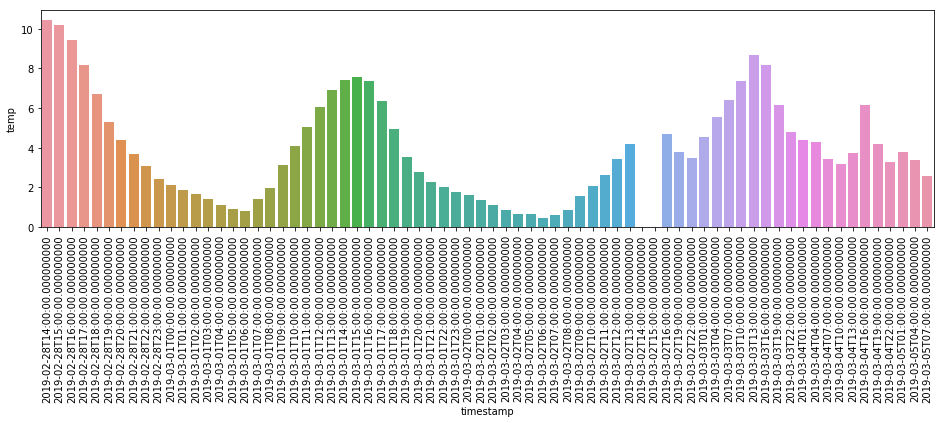

In [30]:
df['timestamp'] = df.apply(lambda x: datetime.datetime.strptime(x['time'],'%Y%m%d%H%M%S'), axis=1)
df['t'] = df.apply(lambda x: round(x['temp'],0), axis=1)
plt.rcParams["figure.figsize"] =(16,4)
ax = sns.barplot(y="temp", x="timestamp", data=df.loc[1:72 ,])
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

In [32]:
print("Min temp is {}".format(df.t.min()))
print("Max temp is {}".format(df.t.max()))
print("Min record")
display(HTML(df[df['t'] == df.t.min()].to_html()))

print("Max record")
display(HTML(df[df['t'] == df.t.max()].to_html()))

Min temp is -5.0
Max temp is 10.0
Min record


,city,country,id,lastupdate,latitude,longitude,sunrise,sunset,timezone,humidity,prec10,prec50,prec75,prec90,precip1,precip3,precip6,precipType,pressure,symbol,temp,temp10,temp50,temp90,time,visibility,windDegree,windDir,windGust,windSpeed,windspeed10,windspeed50,windspeed90,timestamp,t
80,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,82.35678,NaN,NaN,NaN,NaN,NaN,NaN,0.0,sne,1013.17126,1.0,-4.831238,NaN,NaN,NaN,20190306070000,NaN,317.849419,NV,NaN,1.609391,NaN,NaN,NaN,2019-03-06 07:00:00,-5.0


Max record


,city,country,id,lastupdate,latitude,longitude,sunrise,sunset,timezone,humidity,prec10,prec50,prec75,prec90,precip1,precip3,precip6,precipType,pressure,symbol,temp,temp10,temp50,temp90,time,visibility,windDegree,windDir,windGust,windSpeed,windspeed10,windspeed50,windspeed90,timestamp,t
0,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,42.121690,-0.000079,0.0,0.0,0.000032,0.0,0.0,0.0,regn,1008.54315,1.0,10.159515,9.041473,10.225311,11.147247,20190228130000,62656.260,337.850328,NNV,8.855022,3.325939,2.858570,3.321029,3.804244,2019-02-28 13:00:00,10.0
1,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,39.782684,-0.000015,0.0,0.0,0.000041,0.0,0.0,0.0,regn,1008.95685,1.0,10.434570,9.358673,10.431580,11.471130,20190228140000,62657.723,335.516228,NNV,9.207598,3.626003,3.365493,3.582502,4.107125,2019-02-28 14:00:00,10.0
2,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,39.768127,-0.000069,0.0,0.0,0.000017,0.0,0.0,0.0,regn,1008.51490,1.0,10.200348,9.226898,10.158417,11.147125,20190228150000,33362.227,331.578993,NNV,8.913063,3.721870,3.389740,3.707407,4.263792,2019-02-28 15:00:00,10.0
